# Detección de tweets meteorológicos con Bag of Words

## Funciones

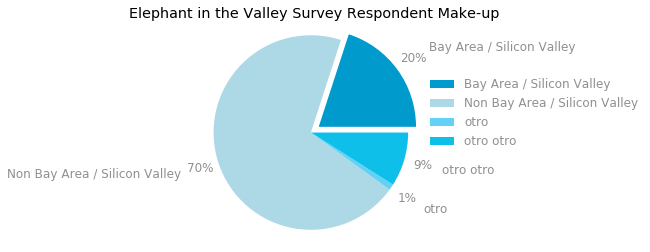

In [2]:
fig, ax = plt.subplots()
#plt.rcParams['font.sans-serif'] = 'Arial'
#plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
labels = ['Bay Area / Silicon Valley', 
         'Non Bay Area / Silicon Valley',
         'otro', 'otro otro']
percentages = [20,70,1, 9]
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
explode=(0.1,0,0,0)
ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:4], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Elephant in the Valley Survey Respondent Make-up")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

['msj_stemm', 'msj_noplural', 'msj_noemoji', 'msj_emoji', 'msj_esp', 'msj_stemmesp', 'msj_yanosequenombreponer', 'msj_ort']
Entrenamiento con la columna msj_ort
Tamaño: 3475
Mensajes Normalizados 
 Tamaño del diccionario: 6246
Socrates con: TAG, msj_ort
Tamaño de los mensajes: 3475
Generando TRAIN Y TEST:
Tamaño de cada tag: 1359
División Train y Test generada para la proporción de 80.000000 - 20.000000
Entrenamiento activado con capas ocultas: 3 con  [25, 10, 5] neuronas
Entrenando con un lr = 0.020000, hasta 15 epocas error mínimo de: 0.005000
Epoch: 0 0.729071
Epoch: 1 0.331355
Epoch: 2 0.215415
Epoch: 3 0.207386
Epoch: 4 0.154713
Epoch: 5 0.120751
Epoch: 6 0.117071
Epoch: 7 0.109114
Epoch: 8 0.101057
Epoch: 9 0.078895
Epoch: 10 0.069732
Epoch: 11 0.079207
Epoch: 12 0.067065
Epoch: 13 0.059259
Epoch: 14 0.074813
Epoch: 15 0.038233


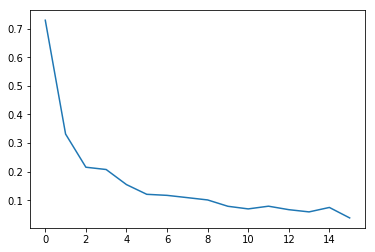

 Aciertos a tweets meteorológicos: 27.55 % 
 Aciertos a tweets no meteorologicos: 11.788 % 
 Sorpresas:  17.351 % 
 Falsos positivos:  43.311 %


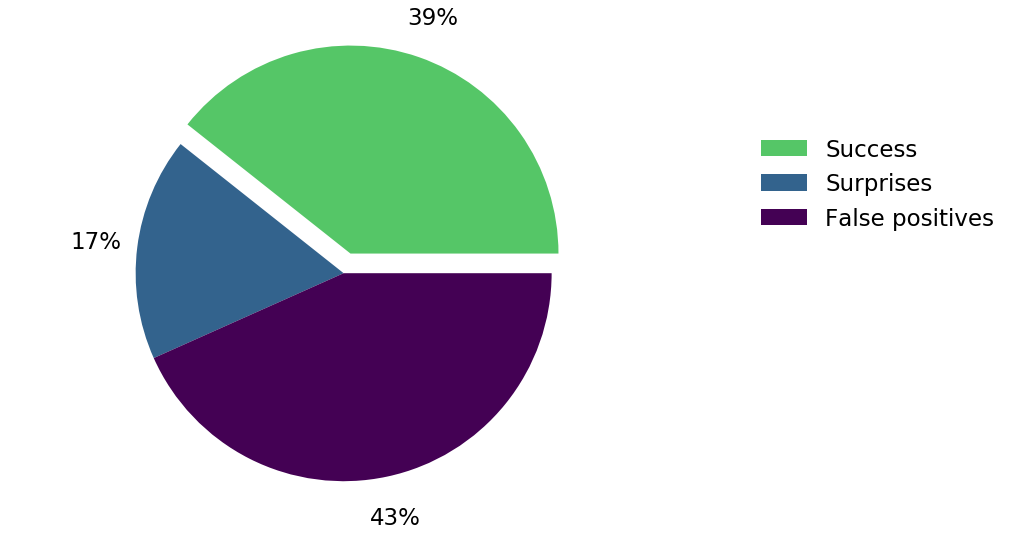

Imagen de wordcloud


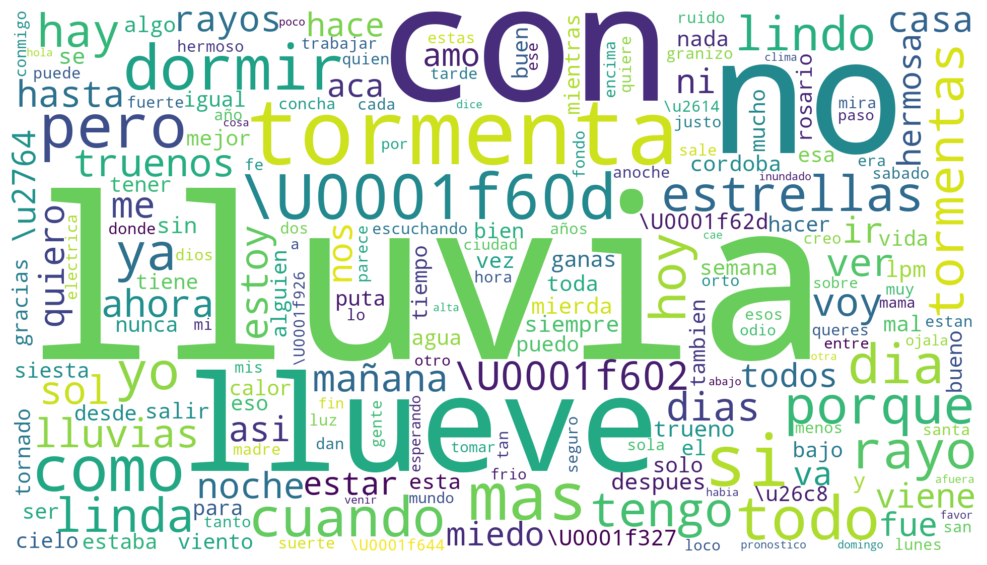

Entrenamiento con la columna msj_ort


In [1]:
from olimpo import *    

%matplotlib inline


def hera(TW, name_MSJ = 'MSJ',name_TAG = 'TAG', size = 0.8, 
         train_data = False, capas_ocultas = [], nombre_modelo = 'BOWCLASS',
        lr = 0.1, epocas = 20, err = 0.01,
        emoticones = False, wordcloud = False, max_words = 200, opt = 'sgd'):
    
    """
    The 'hera' function takes a "zeused" Dataframe and creates the dictionary of all the words and frecuencies with 'alexandria' 
    and saves it on a new csv called 'diccionario.csv'.
    After that the data is sorted and is passed throu the function 'socrates' that returns the train and test split dataset.
    When the train and test is done, it makes the label_to_ix dic and makes the training with the 'atenas' function.
    At the end it shows the validation plots and verification with the 'cronos' function and
    if it is asked, it plots the wordcloud image with 'afrodita' function 
    
    ------------------------------------
    Datos de entrada:
    ------------------------------------
    TW = The zeuzed dataframe
    name_MSJ = the name of de message tha will be for training.
    name_TAG = name of the TAG column
    size = tamaño del train
    train_data = bool que indica si se produce el train.
    capas_ocultas = lista de tamaños de las capas ocultas de la red
    lr = Learning rate 
    epocas = epocas de la red
    err = De la red
    emoticones = True if you want to use the emoticons on the training
    wordcloud = bool para hacer la imagen.
    max_words = max cant of words showed on the wordcloud image
    opt = is the optimizer method of backpropagation of the net
    
    ------------------------------------
    Datos de salida:
    ------------------------------------
    train, test = Datos devueltos por socrates
    label_to_ix = diccionario de los tags
    model = Modelo generado por atenas
    verificacion = Datos devueltos por cronos
    
    """
    
    ########################################################
    """""""""""""""""GENERAMOS DATA TRAIN Y TEST"""""""""""""""""
    ########################################################
    
    ## Toma los tweets, los asocia con su tag y luego los divide en cada una de las palabras que los componen
    # SOCRATES ES LA FUNCION QUE CARGA LOS DATOS TRAIN Y TEST
     
    print('Tamaño: %s'%len(TW))
    TW[name_MSJ] = TW[name_MSJ].astype(str)
    
    
    
    
    
    dic, frec = alexandria(TW[name_MSJ])
    
    print('Mensajes Normalizados \n Tamaño del diccionario: %i' %len(dic))

    ########################################################
    """""""""""""""""GENERAMOS EL DICCIONARIO"""""""""""""""""
    ########################################################   
    
    
    DIC = pd.DataFrame(list(zip(dic,frec)),columns = ['DIC','FREC'])
    DIC.to_csv(r'diccionario.csv', sep = ';')
    
    TW = TW.sort_values(by=[name_TAG])
    
    TAG = TW[name_TAG]
    MSJ = TW[name_MSJ].astype(str)
    print('Socrates con: %s, %s'%(name_TAG,name_MSJ))
    train, test = socrates(MSJ,TAG,size)
       
    
    print('División Train y Test generada para la proporción de %f - %f' %(size*100, (1-size)*100))
    
    
    ## Guardo los labels, (en este caso 1 y 0) en un diccionario
    label_to_ix = { '1': 0, '0': 1 } 
    # 1 = Meteorológico
    # 0 = No meteorológico
    model = None
    if train_data == True:
        print('Entrenamiento activado con capas ocultas: %i con '%(len(capas_ocultas)),capas_ocultas, 'neuronas')

        model = atenas(train = train,word_to_ix = dic, label_to_ix = label_to_ix,
                       capas = capas_ocultas, lr = lr, epocas = epocas, err = err, opt = opt, nombre_modelo = nombre_modelo)
        
        verificacion = cronos(test,dic, model)
        
        torch.save(model,f = './Modelo'+name_MSJ) # Modelo guardado

        
    else: verificacion= None
    
    if wordcloud == True:
        print('Imagen de wordcloud')
        afrodita(frec)
    

    return train,test,label_to_ix, model,verificacion


data = pd.read_csv('../GEN_DATASET/BaseRed.csv',sep=';')

cols = list(data.columns[2:].values)
cols.append(data.columns[0])
print(cols)

TW = data
#for col in cols:
col = 'msj_ort'
print('Entrenamiento con la columna %s'%col)
train, test, label_to_ix, model, verificación = hera(TW,
                                    name_MSJ = col,train_data=True, capas_ocultas=[25,10,5],size=0.8,
                                    epocas = 15, lr = 0.02 ,err =0.005,opt='sgd',wordcloud = True,
                                    max_words= 200)
print('Entrenamiento con la columna %s'%col)

In [1]:
from olimpo import *
data = pd.read_csv('../GEN_DATASET/BaseRed.csv',sep=';')

TW = data
print(data.columns)
col = 'msj_yanosequenombreponer'
dic, frec = alexandria(TW[col])


#afrodita(frec, width= 2048, height=800)


Index(['msj_ort', 'TAG', 'msj_stemm', 'msj_noplural', 'msj_noemoji',
       'msj_emoji', 'msj_esp', 'msj_stemmesp', 'msj_yanosequenombreponer'],
      dtype='object')


In [ ]:
WordCloud()

# MECHIII
## Este es el siguiente paso

Index(['msj_ort', 'TAG', 'msj_stemm', 'msj_noplural', 'msj_noemoji',
       'msj_emoji', 'msj_esp', 'msj_stemmesp', 'msj_yanosequenombreponer'],
      dtype='object')
3475 3475
0 13.394032925367355
1 9.58035922050476
2 7.824454218149185
3 5.867114938795567
4 4.162969559431076
5 2.9009021669626236
6 2.2014180067926645
7 1.7118334881961346
8 1.3504885155707598
9 1.1675854702480137
10 0.9787740409374237
11 0.9038502024486661
12 0.833685589954257
13 0.8415803983807564
14 0.7482099845074117
15 0.7110085161402822
16 0.6479273606091738
17 0.5971793159842491
18 0.626690975856036
19 0.5963156279176474


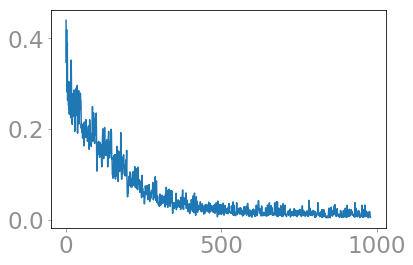

Accuracy: 64.0
Surprises: 8.0
False positives: 28.0
Total: 50


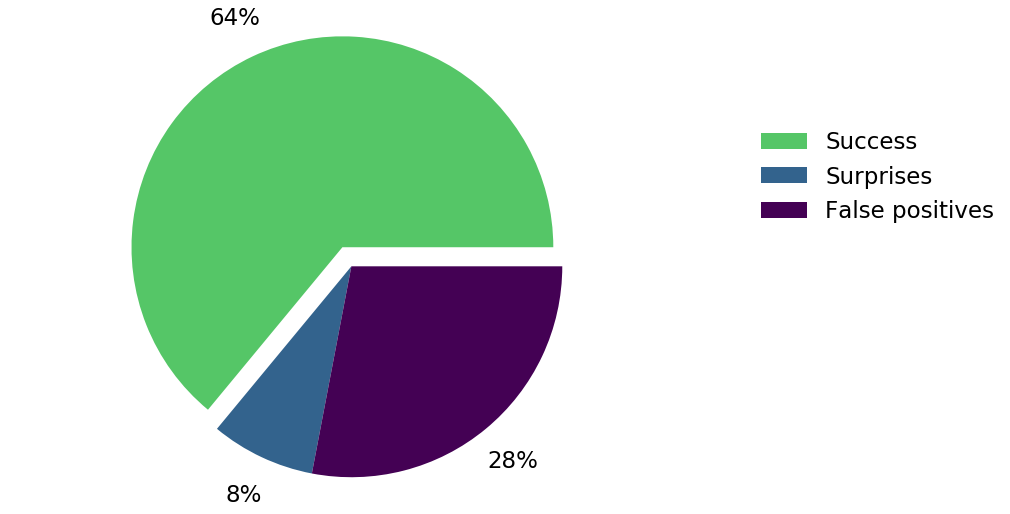

In [52]:
def sequence( reviews, worddict):
    indexed = []
    for words, label in reviews:
        seq = [ worddict[word] for word in words if word in worddict ]
        indexed.append( (seq, [label]) )
    return indexed

def vocabulary( reviews):
    words = set([ word for word_list, label in reviews for word in word_list ])
    wordlist = list(words)
    worddict = { word:index for index,word in enumerate(wordlist) }
    return wordlist, worddict

#Tw = pd.read_csv('tweets.csv',sep = ';')
#corpus = ' /fintwit/ '.join(list(Tw['text']))
#train = corpus.split()


data = pd.read_csv('../GEN_DATASET/BaseRed.csv',sep=';')
print(data.columns)
train = data['msj_stemmesp']#[:int(len(data['msj_stemmesp'])*3/4)]
tag = data['TAG']#[:int(len(train))]

#print(list(train))


#dic, frec = alexandria(train)

tr =[]
print(len(train),len(tag))

for i in range(len(tag)):
    if str(train[i])!='nan':
        tr.append((train[i].split(),tag[i]))

wl,wd = vocabulary(tr)

seqs = sequence(tr, wd)

P = len(tr)
N = len(wl)
T = 20
B = 50
L = 200      # Review Max. Len.

#Necesita que la matriz P x L sea long int
pads = torch.LongTensor( P, L)
for i in range(P):
    # Setea todo en 0
    seq = seqs[i][0]
    M = len(seq)
    pads[i] = 0
    if M == 0: continue
    if M<L:
        pads[i,-M:] = torch.tensor(seq)
    else:
        pads[i] = torch.tensor(seq[:L])

        
# Guarda los labels
labels = torch.tensor([ label for words,label in tr], dtype=torch.float)

# DEJO EL 25% PARA EL TEST
trn_inputs =   pads[:-N//4]
trn_target = labels[:-N//4]

tst_inputs =   pads[-N//4:]
tst_target = labels[-N//4:]

## Esta linea la dejo asi, funciones virtuales...

trn_data = TensorDataset( trn_inputs, trn_target)
tst_data = TensorDataset( tst_inputs, tst_target)

trn_load = DataLoader( trn_data, shuffle=True, batch_size=B)
tst_load = DataLoader( tst_data, shuffle=True, batch_size=B)


class Sentiment( torch.nn.Module):
    def __init__( _, vocab, embed, context, output=1):
        super().__init__()
        _.isize = vocab
        _.esize = embed
        _.hsize = context
        _.osize = output
        
        _.embedding =  torch.nn.Embedding(_.isize, _.esize) # 
        
        # num_layers, dropout apaga neuronas al azar, bidirectional = True entrena otra red al mismo tiempo con las flechas al reves
        # esize es el tamaño del embedding y hsize es la salida
        _.rnn = torch.nn.GRU(_.esize, _.hsize, batch_first = True) # Cantidad de capas que quiero adentro
        
        
        _.l = torch.nn.Linear(_.hsize,_.osize)

    def forward( _, xi):
        
        
        xe = _.embedding(xi)
        
        # xo son todos los h por los que paso la red y h es el ultimo h de salida
        xo, h = _.rnn(xe)
        
        y = torch.tanh(_.l(h))
        
        # squeeze saca todas las dimensiones extras y lo deja como vector
        return y.squeeze()


model = Sentiment( N, 200, 200, 1)
optim = torch.optim.Adam( model.parameters())
lostf = torch.nn.MSELoss()


model.train()
err = []
for t in range(T):
    E = 0.
    
    for words, label in trn_load:

        optim.zero_grad() 
        
        y = model(words)
        loss = lostf(y,label)

        loss.backward()
        
        err.append(loss.item())


        optim.step()
        
        E += loss.item()
        
    print( t, E)
plt.plot(err)
plt.show()

model.eval()
with torch.no_grad():
    r, t, s, fp = 0, 0, 0, 0
    for words, label in tst_load:
        senti = model(words)

        for prob,lab in zip(senti,label):
            if prob <0.5 and lab == 1: s+=1
            if prob >0.5 and lab == 0: fp +=1
        #print(label[0],senti[0], s, (senti>0.5)==(label==0))
        r += ( (senti>=0.5)==(label==1) ).sum().item()
        t += len(label)
        break

print( "Accuracy:", 100*r/t)
print( "Surprises:", 100*s/t)
print( "False positives:", 100*fp/t)
print("Total:",t)



fig, ax = plt.subplots(figsize=(12,9))
#plt.rcParams['font.sans-serif'] = 'Arial'
#plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
#plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=23
labels = ['Success', 
         'Surprises',
         'False positives']

percentages = [r ,s,fp]

color_palette_list = ['#55C667FF', '#33638DFF','#440154FF' , '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
explode=(0.1,0.,0.)
ax.pie(percentages, explode=explode,   
       colors=color_palette_list[0:3], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
#ax.set_title("Elephant in the Valley Survey Respondent Make-up")
ax.legend(labels[0:3],frameon=False, bbox_to_anchor=(1.5,0.8))

plt.show()


# Solo Embedding


In [3]:
data = pd.read_csv('tweets.csv',sep=';')


In [7]:
from olimpo import *

class Embedd(torch.nn.Module):
    
    def __init__(_,vocab,embed,context):
        
        super().__init__()
        _.isize = vocab
        _.esize = embed
        _.context = context
        
        _.embedding = torch.nn.Embedding(_.isize,_.esize)
        
        _.linear1 = nn.Linear(_.context * _.esize, 128)
        _.linear2 = nn.Linear(128, _.isize)

    def forward(_, inputs):
        embeds = _.embedding(inputs).view((1, -1))
        out = F.relu(_.linear1(embeds))
        out = _.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs
        


train = data['text'][:1000]
train_sentence =dioni( ' '.join(train).split(), ignorar=False)

trigrams = [([train_sentence[i], train_sentence[i + 1]], train_sentence[i + 2]) for i in range(len(train_sentence) - 2)]

# Guarda los labels
#labels = torch.tensor([ label for words,label in trigrams], dtype=torch.float)

N = len(trigrams)
B = 50

## Esta linea la dejo asi, funciones virtuales...
#from torch.utils.data import TensorDataset, DataLoader

#trn_data = TensorDataset( (contex, labels) for context,labels in trigrams[:-N//4])
#tst_data = TensorDataset( (contex, labels) for context,labels in trigrams[-N//4:])

#trn_load = DataLoader( trn_data, shuffle=True, batch_size=B)
#tst_load = DataLoader( tst_data, shuffle=True, batch_size=B)



print(trigrams[:3])

vocab = set(train_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}

losses = []
loss_function = nn.NLLLoss()
model = Embedd(len(vocab), 300, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for epoch in range(10):
    total_loss = 0
    for context, target in trigrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_idxs)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a tensor)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        # Get the Python number from a 1-element Tensor by calling tensor.item()
        total_loss += loss.item()
    losses.append(total_loss)
    print('Epoch: %i'%epoch)
plt.plot(losses)
print(losses)  # The loss decreased every iteration over the training data!

[([' ni ', ' la '], ' lluvia '), ([' la ', ' lluvia '], ' los '), ([' lluvia ', ' los '], ' detuvo  \\u0001f327  ')]


KeyboardInterrupt: 

In [39]:
model.eval()
with torch.no_grad():
    r, t, s, fp = 0, 0, 0, 0
    for words, label in tst_load:
        senti = model(words)

        for prob,lab in zip(senti,label):
            if prob <0.5 and lab == 1: s+=1
            if prob >0.5 and lab == 0: fp +=1
        #print(label[0],senti[0], s, (senti>0.5)==(label==0))
        r += ( (senti>=0.5)==(label==1) ).sum().item()

        t += len(label)
        break

print( "Accuracy:", 100*r/t)
print( "Surprises:", 100*s/t)
print( "False positives:", 100*fp/t)



Accuracy: 58.0
Surprises: 18.0
False positives: 24.0


In [ ]:

P = len(reviews)
N = len(wl)
T = 10
B = 50
L = 75      # Review Max. Len.

#Necesita que la matriz P x L sea long int
pads = torch.LongTensor( P, L)
for i in range(P):
    # Setea todo en 0
    seq = seqs[i][0]
    M = len(seq)
    pads[i] = 0
    if M<L:
        pads[i,-M:] = torch.tensor(seq)
    else:
        pads[i] = torch.tensor(seq[:L])

In [1]:
from olimpo import *    

%matplotlib inline

label_to_ix = { '1': 0, '0': 1 } 

def embedding(train, word_to_ix, lr = 0.01,err = 0.001, epocas = 3):

    VOCAB_SIZE = len(word_to_ix)
        
    model = EmbeddingTrain(VOCAB_SIZE, 300)
    
    loss_function = nn.MSELoss()
    
    optimizer = optim.Adam(model.parameters(), lr)

    model.train()
    error = []

    epoch, e = 0,1
    
    while epoch <= epocas and e >= err:

        for instance, target in zip(train[:-1],train[1:]):

            #if instance == 'nan': continue
            # Hay que resetear los gradientes antes de hacer cuentas
            model.zero_grad()

            # Hacemos el vector de bag of words
            
            one_hoti = EmbeddingTrain.one_hot(instance, word_to_ix)
            one_hoto = EmbeddingTrain.one_hot(target, word_to_ix)
            # Guardamos el label del diccionario de Tags
            
            print(instance, target)
            print(word_to_ix[instance], word_to_ix[target])
            
            #target = EmbeddingTrain.make_target(target, label_to_ix)

            
            # Hacemos el forward pass.
            log_probs = model(one_hoti)

            # Calculamos el error
            loss = loss_function(log_probs, one_hoto)

            # Le pedimos a torch que busque los gradientes con back propagation

            loss.backward()

            # Usamos SGD para hacer back propagation y modificar los pesos
            optimizer.step()
        e = loss
        error.append(loss) 
        print('Epoch: %i %f' %(epoch,error[-1]))
        epoch +=1


    #######################
    """GRÁFICO DEL ERROR"""
    #######################
    plt.figure()
    plt.plot(error)
    plt.show()
    
    
    return model

#Tw = pd.read_csv('tweets.csv',sep = ';')
#corpus = ' /fintwit/ '.join(list(Tw['text']))
#train = corpus.split()
#corpus = 0
data = pd.read_csv('../GEN_DATASET/BaseRed.csv',sep=';')

train = data['msj_stemmesp']
tag = data['TAG']

cols = list(data.columns[2:].values)
cols.append(data.columns[0])

dic, frec = alexandria(data['msj_stemmesp'])

embedding(train,dic)



¡Ni la
0 1


RuntimeError: Expected tensor for argument #1 'indices' to have scalar type Long; but got CPUType instead (while checking arguments for embedding)

In [ ]:
from olimpo import *    

%matplotlib inline


def embedding(train, word_to_ix, lr = 0.01,err = 0.001, epocas = 3):

    VOCAB_SIZE = len(word_to_ix)
        
    model = EmbeddingTrain(VOCAB_SIZE, 300)
    
    loss_function = nn.MSELoss()
    
    optimizer = optim.Adam(model.parameters(), lr)

    model.train()
    error = []

    epoch, e = 0,1
    
    while epoch <= epocas and e >= err:

        for instance, target in zip(train[:-1],train[1:]):

            #if instance == 'nan': continue
            # Hay que resetear los gradientes antes de hacer cuentas
            model.zero_grad()

            # Hacemos el vector de bag of words
            
            one_hoti = EmbeddingTrain.one_hot(instance, word_to_ix)
            one_hoto = EmbeddingTrain.one_hot(target, word_to_ix)
            # Guardamos el label del diccionario de Tags
            
            print(instance, target)
            print(word_to_ix[instance], word_to_ix[target])
            
            #target = EmbeddingTrain.make_target(target, label_to_ix)

            
            # Hacemos el forward pass.
            log_probs = model(one_hoti)

            # Calculamos el error
            loss = loss_function(log_probs, one_hoto)

            # Le pedimos a torch que busque los gradientes con back propagation

            loss.backward()

            # Usamos SGD para hacer back propagation y modificar los pesos
            optimizer.step()
        e = loss
        error.append(loss) 
        print('Epoch: %i %f' %(epoch,error[-1]))
        epoch +=1


    #######################
    """GRÁFICO DEL ERROR"""
    #######################
    plt.figure()
    plt.plot(error)
    plt.show()
    
    
    return model

Tw = pd.read_csv('tweets.csv',sep = ';')
Tw.head

In [2]:

#model2 = torch.load('./Modelomsj_stemmesp') # Carga de modelo


In [7]:
data = pd.read_csv('../GEN_DATASET/BaseRed.csv',sep=';')

cols = list(data.columns[2:].values)
cols.append(data.columns[0])
print(cols)
#data.head()

['msj_stemm', 'msj_noplural', 'msj_noemoji', 'msj_emoji', 'msj_esp', 'msj_stemmesp', 'msj_ort']


In [3]:
TW = data
#for col in cols:
col = 'msj_stemm'
print('Entrenamiento con la columna %s'%col)
#train, test, label_to_ix, model, verificación = hera(TW,
#                                name_MSJ = col,train_data=True, capas_ocultas=[10,10],
#                                epocas = 50, lr = 0.02 ,err =0.001,opt='sgd',wordcloud = True,
#                                max_words= 200)
print('Entrenamiento con la columna %s'%col)


Entrenamiento con la columna msj_stemm
Entrenamiento con la columna msj_stemm


In [6]:
dic = pd.read_csv('diccionario.csv',sep=';')
a = {w:ix for ix,w in zip( dic['Unnamed: 0'], dic['DIC'])}
a['esta']

0

In [4]:
from olimpo import *
twit = ['soy una tormenta de dulzura', 'linda lluvia de estrellas',
       'como no quedarme tomando helado con esta lluvia del orto',
       'si me gustaria ser un pez para que no me rompa las bolas esta lluvia',
       'lluvia de mierda']

m = dioni(twit)

dic = pd.read_csv('diccionario.csv',sep=';')

dic = {w:ix for ix,w in zip(dic['Unnamed: 0'],dic['DIC'])}
#print (dic)
for i in range(len(twit)):

    for word in m[i].split():
        if word not in dic:
            dic[word]= len(dic)

    label_to_ix = { '1': 0, '0': 1 } 


    bow_vec = BoWClassifier.make_bow_vector(m[i].split(),dic)

                # Guardamos el label del diccionario de Tags

    #target = BoWClassifier.make_target(label, label_to_ix)
    model = BoWClassifier([len(dic),2])

                # Hacemos el forward pass.
    log_probs = model2(bow_vec)

    print(twit[i])
    print(m[i])
    print(log_probs)
    if torch.argmax( log_probs[0]) == 0: print('Es Meteorológico')
    else: print('No es Meteorológico')

NameError: name 'model2' is not defined

In [33]:
#TW = zeus(archivo = 'base_corr_orto - Copy of base_corr.csv', Data_path = './tweets.csv',
#        name_MSJ = 'Twit',name_TAG = 'Tag', name_NUM = 'Num',name_USER = 'user_id')



### CORRECCIÓN ###
TW['MSJ_ORT'] = pd.read_csv('../GEN_DATASET/BaseRed.csv',sep=';')


emoticones = True
em = []
alfa = list('ghijklmnopqrstuvwxyz')

    
if emoticones == True:
    for i, msj in enumerate(TW['MSJ_ORT']):
        msj = msj.lower().split()
        for j,word in enumerate(msj):
            if '\\u' in word:
                em.append(word)
                #print(word)
                print(i)
                word = ''
                #if np.any(alfa in word)
                msj[j]=word
        msj= ' '.join(msj)
        #print(msj)
        TW['MSJ_ORT'][i] = msj
    print(len(em))
    #print(em)

            

train, test, label_to_ix, model, verificación = hera(TW,name_MSJ = 'MSJ_ORT',train_data=True, capas_ocultas=[],
                                                epocas = 50, lr = 0.02 ,err =0.001,opt='Adam',wordcloud = True, max_words= 200)

#torch.save( model.state_dict(), "bow.state")      # Se puede grabar...
#model.load_state_dict( torch.load( "bow.state"))  # ...y volver a recuperar

path = './' 
file = 'Modelo_checkpoint'

torch.save(model,path+file) # Modelo guardado

model2 = torch.load(path+file) # Carga de modelo

#torch.save(model.state_dict(path+file)) # Estados que quiero guardar

#model.load_state_dict(torch.load(path+file)) # Carga de estado

                                                

Archivo crudo cargado de ./tweets.csv
Datos corregidos cargados de "base_corr_orto - Copy of base_corr.csv"
2739 2917


ValueError: Wrong number of items passed 8, placement implies 1

In [ ]:
for i in em:
    if len(i)>10:
        print(i)

In [2]:

path = './' 
file = 'Modelo_checkpoint'

torch.save(model,path+file) # Modelo guardado

model2 = torch.load(path+file) # Carga de modelo

#torch.save(model.state_dict(path+file)) # Estados que quiero guardar

#model.load_state_dict(torch.load(path+file)) # Carga de estado

                                                

NameError: name 'torch' is not defined

In [30]:
lstm = nn.LSTM(3, 3) # Input dim is 3, output dim is 3. El 3 es dim de h creo
inputs = [ torch.randn((1,3)) for _ in range(2) ] # make a sequence of length 5
print(inputs.shape)
# initialize the hidden state.  
hidden = (torch.randn(1,1,3), torch.randn((1,1,3)))
for i in inputs:
    # Step through the sequence one element at a time.
    # after each step, hidden contains the hidden state.
    out, hidden = lstm(i.view(1,1,-1), hidden) #out es el nuevo vector de memoria, hidden es el mismo vector anterior

#Puedo hacer lo mismo sin el for pero directo con todos los inputs concatenados 
    
# alternatively, we can do the entire sequence all at once.
# the first value returned by LSTM is all of the hidden states throughout the sequence.
# the second is just the most recent hidden state (compare the last slice of "out" with "hidden" below,
# they are the same)
# The reason for this is that:
# "out" will give you access to all hidden states in the sequence
# "hidden" will allow you to continue the sequence and backpropogate, by passing it as an argument
# to the lstm at a later time
inputs = torch.cat(inputs).view(len(inputs), 1, -1) # Add the extra 2nd dimension
hidden = (autograd.Variable(torch.randn(1,1,3)), autograd.Variable(torch.randn((1,1,3)))) # clean out hidden state
out, hidden = lstm(inputs, hidden)
#print (out)
#print (hidden)

def prepare_sequence(seq, to_ix):
    idxs = list(map(lambda w: to_ix[w], seq))
    tensor = torch.LongTensor(idxs)
    return autograd.Variable(tensor)


training_data = [
    ("The dog ate the apple".split(), ["DET"]),
    ("Everybody read that book".split(), ["NN"])
]
word_to_ix = {}
for sent, tags in training_data:
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
#print (word_to_ix)
tag_to_ix = {"DET": 0, "NN": 1}

# These will usually be more like 32 or 64 dimensional.
# We will keep them small, so we can see how the weights change as we train.
EMBEDDING_DIM = 6
HIDDEN_DIM = 6

class LSTMTagger(nn.Module):
    
    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim
        
        #Matriz de WE
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        
        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)
        
        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
        self.hidden = self.init_hidden()
        
    def init_hidden(self):
        # Before we've done anything, we dont have any hidden state.
        # Refer to the Pytorch documentation to see exactly why they have this dimensionality.
        # The axes semantics are (num_layers, minibatch_size, hidden_dim)
        return (torch.zeros(1, 1, self.hidden_dim),
                torch.zeros(1, 1, self.hidden_dim))
        
    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, self.hidden = self.lstm(embeds.view(len(sentence), 1, -1), self.hidden)
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)#Por columnas
        return tag_scores
    
    
model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word_to_ix), len(tag_to_ix))
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# See what the scores are before training
# Note that element i,j of the output is the score for tag j for word i.
inputs = prepare_sequence(training_data[0][0], word_to_ix)
tag_scores = model(inputs).exp()
print ('tagscores: ',tag_scores)

#Pack secuence
for epoch in range(300): # again, normally you would NOT do 300 epochs, it is toy data
    for sentence, tags in training_data:
        # Step 1. Remember that Pytorch accumulates gradients.  We need to clear them out
        # before each instance
        model.zero_grad()
        
        # Also, we need to clear out the hidden state of the LSTM, detaching it from its
        # history on the last instance.
        model.hidden = model.init_hidden()
    
        #Puedo hacer model.hidden = model.hidden.detach o algo asi para desconectarlo
    
        # Step 2. Get our inputs ready for the network, that is, turn them into Variables
        # of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = prepare_sequence(tags, tag_to_ix)
    
        # Step 3. Run our forward pass.
        tag_scores = model(sentence_in)
        #print(tag_scores,targets)
        # Step 4. Compute the loss, gradients, and update the parameters by calling
        # optimizer.step()
        loss = loss_function(tag_scores, targets)
        loss.backward()
        optimizer.step()
        
# See what the scores are after training
inputs = prepare_sequence(training_data[0][0], word_to_ix)
tag_scores = model(inputs)
# The sentence is "the dog ate the apple".  i,j corresponds to score for tag j for word i.
# The predicted tag is the maximum scoring tag.
# Here, we can see the predicted sequence below is 0 1 2 0 1
# since 0 is index of the maximum value of row 1,
# 1 is the index of maximum value of row 2, etc.
# Which is DET NOUN VERB DET NOUN, the correct sequence!
print (tag_scores.exp())


AttributeError: 'list' object has no attribute 'shape'

In [52]:
from filtro import *

TW = pd.read_csv('base_corr_orto - Copy of base_corr.csv')

filtro_mmechi(TW,'tweets.csv','Twit', 'Tag','Num')

IndexError: too many indices for array

In [13]:
a = [11,11,1,2,3,2,2,2,2,1,1,1,2]
a = list(map(str,a))
print (a)
for i in set (a):
    print(sum(np.char.count(a,i)))

['11', '11', '1', '2', '3', '2', '2', '2', '2', '1', '1', '1', '2']
2
1
6
8


In [8]:
archivo = 'base_corr_orto - Copy of base_corr.csv'
TW = pd.read_csv(archivo)[1:]

train,test , msj,dic,frec = socrates(TW)


Tamaño de los mensajes: 2916
Mensajes Normalizados 
 Tamaño del diccionario: 4931
Generando TRAIN Y TEST:
Tamaño de cada tag: 1033


In [9]:
#print(train)#+msj[1])

CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
# We will use Shakespeare Sonnet 2
m = ' '.join(msj[:100]).split()

# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)
trigrams = []
for i in range(len(train)):
    test_sentence = train[i][0]
    tag = train[i][1]
    if len(test_sentence)<3:
        continue
    trigrams.append([ ([test_sentence[i], test_sentence[i+1]], tag) for i in range(len(test_sentence) - 2) ])
    #print (trigrams[-1]) # print the first 3, just so you can see what they look like

In [77]:
train[0][0]

['orto',
 'ensuciaron',
 'vidrios',
 'causa',
 'lluvia',
 'ayer',
 'limpiado',
 'cosadeveterana']

cantidad de trigramas:  1908
Trigrama:  0
Trigrama:  100
Trigrama:  200
Trigrama:  300
Trigrama:  400
Trigrama:  500
Trigrama:  600
Trigrama:  700
Trigrama:  800
Trigrama:  900
Trigrama:  1000
Trigrama:  1100
Trigrama:  1200
Trigrama:  1300
Trigrama:  1400
Trigrama:  1500
Trigrama:  1600
Trigrama:  1700
Trigrama:  1800
Trigrama:  1900
Epoch: 0 7992.148926
Trigrama:  0
Trigrama:  100
Trigrama:  200
Trigrama:  300
Trigrama:  400
Trigrama:  500
Trigrama:  600
Trigrama:  700
Trigrama:  800
Trigrama:  900
Trigrama:  1000
Trigrama:  1100
Trigrama:  1200
Trigrama:  1300
Trigrama:  1400
Trigrama:  1500
Trigrama:  1600
Trigrama:  1700
Trigrama:  1800
Trigrama:  1900
Epoch: 1 7919.699219
Trigrama:  0
Trigrama:  100
Trigrama:  200
Trigrama:  300
Trigrama:  400
Trigrama:  500
Trigrama:  600
Trigrama:  700
Trigrama:  800
Trigrama:  900
Trigrama:  1000
Trigrama:  1100
Trigrama:  1200
Trigrama:  1300
Trigrama:  1400
Trigrama:  1500
Trigrama:  1600
Trigrama:  1700
Trigrama:  1800
Trigrama:  1900
Epoch

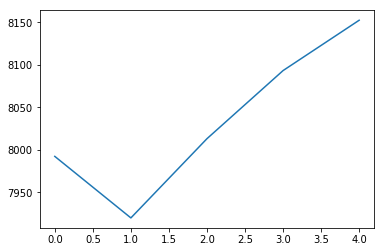

In [12]:
class NGramLanguageModeler(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, context_size,num_labels):
        super(NGramLanguageModeler, self).__init__()
        #Asocias a las palabras un embedding
        self.embeddings = nn.Embedding(vocab_size, embedding_dim) 
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)
        self.linear3 = nn.Linear(vocab_size, num_labels)

        
    def forward(self, inputs): #inputs son los indices del contexto creo
        embeds = self.embeddings(inputs).view((1, -1)) #Concateno los vectores de embeddings
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out) #Tamaño de mi vocabulario
        out = self.linear3(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs
    def make_target(label):
        
        label_to_ix = { '1': 0, '0': 1 } 
        return torch.LongTensor([label_to_ix[label]])
    
losses = []
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(dic), EMBEDDING_DIM, CONTEXT_SIZE, 2) #Creo el modelo
optimizer = optim.SGD(model.parameters(), lr=0.01) #stocastic gradien descent

#Entrenamiento
print('cantidad de trigramas: ',len(trigrams))
for epoch in range(5):
    total_loss = torch.Tensor([0])
    for i,tri in enumerate(trigrams):
        for context, label in tri: #Contexto y la palabra


            context_idxs = list(map(lambda w: dic[w], context))

            context_var = autograd.Variable( torch.LongTensor(context_idxs) )


            model.zero_grad()

            target = NGramLanguageModeler.make_target(label)
            # Step 3. Run the forward pass, getting log probabilities over next words
            log_probs = model(context_var)




            # Calculamos el error
            loss = loss_function(log_probs, target)


            #loss = loss_function(log_probs, torch.LongTensor([dic[target]]))

            # Step 5. Do the backward pass and update the gradient
            loss.backward() #backpropagation
            optimizer.step() #actualizacion de los parametros

            total_loss += loss.data
        if i %100 == 0: print('Trigrama: ', i)
    print('Epoch: %i %f' %(epoch,total_loss[-1]))
    losses.append(total_loss)

#######################
"""GRÁFICO DEL ERROR"""
#######################
plt.figure()
plt.plot(losses)
plt.show()
    


In [13]:
trigrams_test = []
for i in range(len(test)):
    test_sentence = test[i][0]
    tag = test[i][1]
    if len(test_sentence)<3:
        continue
    trigrams_test.append([ ([test_sentence[i], test_sentence[i+1]], tag) for i in range(len(test_sentence) - 2) ])
    #print (trigrams[-1]) # print the first 3, just so you can see what they look like

In [ ]:
    
    # Inicializo en 0
    Meteo ,NoMeteo, Sorpresas, Falsos, total = 0,0,0,0,0
    model.eval()
    for context, label in tri: #Contexto y la palabra
        bow_vec = autograd.Variable(BoWClassifier.make_bow_vector(instance, word_to_ix))
        log_probs = model(bow_vec)
        log_probs_exp = log_probs.exp()
        if bool (log_probs_exp[0][0]>0.5):

            if label == 1: 
                Meteo+=1
                total +=1
               # print ('\033[1;93m' , log_probs_exp , label)
            else: 
                Falsos+=1
                total +=1
               # print ('\033[1;31m' , log_probs_exp , label)

        elif bool (log_probs_exp[0][1]>0.5):

            if label == 0:
                NoMeteo+=1
                total +=1
               # print ('\033[1;32m' , log_probs_exp , label)

            else:
                Sorpresas+=1
                total +=1
               # print ('\033[1;66m' , log_probs_exp , label)


    print('\033[0m Aciertos a tweets meteorológicos:', round((Meteo/total)*100, 3),
          '% \n Aciertos a tweets no meteorologicos:', round((NoMeteo/total)*100, 3),
          '% \n Sorpresas: ', round((Sorpresas/total)*100, 3),
          '% \n Falsos positivos: ', round((Falsos/total)*100, 3), '%') 
    
    #####################################################
    """""""""""""""GRÁFICO DE VERIFICACIÓN"""""""""""""""
    #####################################################
    
    fig = plt.figure(figsize=(13,5))
    opacity = 0.4
    bar_width = 0.35

    ax = plt.subplot(1,2,1)

    bar = plt.bar(range(4),[Meteo, NoMeteo,Falsos,Sorpresas],
                  tick_label=['Aciertos \n Meteorológico','Aciertos No \n Meteorológico',
                              'Falsos positivos','Sorpresas'], color = 'skyblue')
    plt.title('Resultados')
    plt.ylabel('Cantidad de aciertos.  Total='+str(total))
    for rect, porcentaje in zip(bar,[Meteo,NoMeteo,Falsos,Sorpresas]):
        height = rect.get_height()- 5
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % round((porcentaje/total)*100, 3) + ' %'
                 ,fontsize = 13, color = 'black',ha='center', va='bottom')
        
    #################################################
    """""""""""""""COMPARACIÓN DE TAGS"""""""""""""""
    #################################################
    ax2 = plt.subplot(1,2,2)

    bar1 = plt.bar(np.arange(2), [Meteo + Sorpresas,NoMeteo + Falsos], bar_width, 
                   tick_label = ['Meteorológicos', 'No Meteorológicos'],
                   color = 'skyblue', label = 'Total de twits'
                  )

    for rect, porcentaje in zip(bar1,[Meteo + Sorpresas,NoMeteo + Falsos]):
        height = rect.get_height()-20
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % porcentaje
                 ,fontsize = 13, color = 'black',ha='center', va='bottom')


    bar2 = plt.bar(np.arange(2) +bar_width*1.1, [Sorpresas,Falsos], bar_width,
                  tick_label = ['Meteorológicos', 'No Meteorológicos'],
                   color = 'salmon' , label= 'Total de Fallas'
                  )
    for rect, porcentaje in zip(bar2,[Sorpresas/(Meteo + Sorpresas),Falsos/(NoMeteo + Falsos)]):
        height = rect.get_height()-20
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d %%' % round(porcentaje*100,3)
                 ,fontsize = 13, color = 'black',ha='center', va='bottom')

    plt.legend()
    plt.title('Comparativa')
    plt.show()
    


In [4]:
#for i, j in zip([200,500,1000],[100,300,200]):
#    msj,dic, frec,train,test, _, model, verif = zeus(train_data=True, capas_ocultas= [i,j],
#                                                 epocas = 40, lr = 0.02 ,err =0.001, wordcloud = False, max_words= 200)

# LO IMPORTANTE ES EL CHOCLO DE ARRIBA

In [8]:
afrodita(frec)

NameError: name 'frec' is not defined

#### Generación del diccionario con el dataset completo

#### Bag of Words

In [128]:
class BoWClassifier(nn.Module): # inheriting from nn.Module!
    
    def __init__(self, sizes):
        
        super(BoWClassifier, self).__init__()

        self.layers = torch.nn.ModuleList()

        for i in range(len(sizes)-1):
            self.layers.append(torch.nn.Linear(sizes[i],sizes[i+1]))
        
        
    def forward(self, bow_vec):
        
        h = bow_vec
        
        # Itero todas las capas menos la ultima
        for hidden in self.layers[:-1]:
            h = torch.tanh (hidden (h))
        #La ultima es output
        output = self.layers[-1]
        y = output(h)
        #La uso con softmax
        
        #soft = F.log_softmax(y , dim=1)
        
        return y
    
    def make_bow_vector(sentence, word_to_ix):
        vec = torch.zeros(len(word_to_ix))
        for word in sentence:
            vec[word_to_ix[word]] += 1
        return vec.view(1, -1)

    def make_target(label, label_to_ix):
        
        return torch.LongTensor([label_to_ix[label]])
    


    


#### Miremos la frecuencia de ocurrencia de palabras en el diccionario

In [105]:
vec = torch.zeros(len(word_to_ix))
for i, label in test+train:
    bow_vector = BoWClassifier.make_bow_vector(i, word_to_ix)
    vec = vec.add(bow_vector)

vec=vec[0].tolist()

In [106]:
## Genero un dataframe que me pemite ordenar de mayor a menor respecto de la columna Frecuencia
tot = pd.DataFrame()
tot['Diccionario'] = list(word_to_ix.keys())
tot['Frecuencia'] = vec
tot['Num'] = word_to_ix.values()
tot = tot.sort_values(by=['Frecuencia'], ascending=False)

### Entrenamiento

In [118]:
## Instancia un el modelo con tamaño sizes

## Capa de entrada va de VOCAB_SIZE a N 
## Capa oculta de N a NUM_LABELS

N, M = 200, 100
sizes = [VOCAB_SIZE, N, M ,NUM_LABELS]

model = BoWClassifier(sizes)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Se suele usar la cantidad de epocas que lleve a la estabilidad sin overfitear

error = []

epoch, e = 0,1
while epoch <= 50 and e >= 1e-3:
    #if epoch % 10 == 0: print('Epoch: %i' %epoch)
    for instance, label in train:
        
        
        # Hay que resetear los gradientes antes de hacer cuentas
        model.zero_grad()
    
        # Hacemos el vector de bag of words
        bow_vec = BoWClassifier.make_bow_vector(instance, word_to_ix)
        
        # Guardamos el label del diccionario de Tags
        target = BoWClassifier.make_target(label, label_to_ix)
    
        # Hacemos el forward pass.
        log_probs = model(bow_vec)
    
        # Calculamos el error
        loss = loss_function(log_probs, target)
    
        # Le pedimos a torch que busque los gradientes con back propagation
        
        loss.backward()
        
        # Usamos SGD para hacer back propagation y modificar los pesos
        optimizer.step()
    e = loss
    error.append(loss) 
    print('Epoch: %i %f' %(epoch,error[-1]))
    epoch +=1


   
plt.figure()
plt.plot(error)
plt.show()

Epoch: 0 0.742054
Epoch: 0 0.935576
Epoch: 0 0.917063
Epoch: 0 0.619750
Epoch: 0 0.491311
Epoch: 0 0.469461
Epoch: 0 0.413673
Epoch: 0 0.467854
Epoch: 0 0.590435
Epoch: 0 0.589443
Epoch: 0 0.653032
Epoch: 0 0.573690
Epoch: 0 0.546326
Epoch: 0 0.492691
Epoch: 0 0.555212
Epoch: 0 0.278232
Epoch: 0 0.304319
Epoch: 0 0.204129
Epoch: 0 0.205157
Epoch: 0 0.180837
Epoch: 0 0.169131
Epoch: 0 0.161606
Epoch: 0 0.148223
Epoch: 0 0.144656
Epoch: 0 0.137337
Epoch: 0 0.132666
Epoch: 0 0.124338
Epoch: 0 0.116336
Epoch: 0 0.107795
Epoch: 0 0.099541
Epoch: 0 0.092158
Epoch: 0 0.086312
Epoch: 0 0.081750
Epoch: 0 0.078436
Epoch: 0 0.076055
Epoch: 0 0.074246


KeyboardInterrupt: 

## Usamos los twits de test para verificar

In [54]:
Meteo = 0
NoMeteo = 0
Sorpresas = 0
Falsos = 0
total = 0
word_to_ix= dic
for instance, label in test:
    bow_vec = autograd.Variable(BoWClassifier.make_bow_vector(instance, word_to_ix))
    log_probs = model(bow_vec)
    log_probs_exp = log_probs.exp()
    if bool (log_probs_exp[0][0]>0.5):
        
        if label == 1: 
            Meteo+=1
            total +=1
           # print ('\033[1;93m' , log_probs_exp , label)
        else: 
            Falsos+=1
            total +=1
           # print ('\033[1;31m' , log_probs_exp , label)

    elif bool (log_probs_exp[0][1]>0.5):
        
        if label == 0:
            NoMeteo+=1
            total +=1
           # print ('\033[1;32m' , log_probs_exp , label)
            
        else:
            Sorpresas+=1
            total +=1
           # print ('\033[1;66m' , log_probs_exp , label)


print('\033[0m Aciertos a tweets meteorológicos:', round((Meteo/total)*100, 3),
      '% \n Aciertos a tweets no meteorologicos:', round((NoMeteo/total)*100, 3),
      '% \n Sorpresas: ', round((Sorpresas/total)*100, 3),
      '% \n Falsos positivos: ', round((Falsos/total)*100, 3), '%') 

#print ('\033[0m', next(model.parameters())[:,word_to_ix["lluvia"]]) # Index corresponding to Spanish goes up, English goes down!



 Aciertos a tweets meteorológicos: 23.176 % 
 Aciertos a tweets no meteorologicos: 18.471 % 
 Sorpresas:  7.294 % 
 Falsos positivos:  51.059 %


## Graficos de verificación

Text(0.5, 1.0, 'Comparativa')

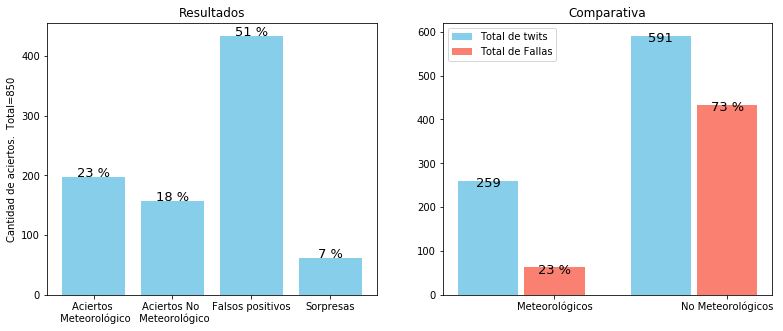

In [55]:
fig = plt.figure(figsize=(13,5))



opacity = 0.4
bar_width = 0.35


"""GRAFICO DE VERIFICACIÓN"""

ax = plt.subplot(1,2,1)

bar = plt.bar(range(4),[Meteo, NoMeteo,Falsos,Sorpresas],
              tick_label=['Aciertos \n Meteorológico','Aciertos No \n Meteorológico',
                          'Falsos positivos','Sorpresas'], color = 'skyblue')
plt.title('Resultados')
plt.ylabel('Cantidad de aciertos.  Total='+str(total))
for rect, porcentaje in zip(bar,[Meteo,NoMeteo,Falsos,Sorpresas]):
    height = rect.get_height()- 5
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % round((porcentaje/total)*100, 3) + ' %'
             ,fontsize = 13, color = 'black',ha='center', va='bottom')

  
"""GRÁFICO DE COMPARACIÓN PARA CADA TAG"""
    
ax2 = plt.subplot(1,2,2)

bar1 = plt.bar(np.arange(2), [Meteo + Sorpresas,NoMeteo + Falsos], bar_width, 
               tick_label = ['Meteorológicos', 'No Meteorológicos'],
               color = 'skyblue', label = 'Total de twits'
              )

for rect, porcentaje in zip(bar1,[Meteo + Sorpresas,NoMeteo + Falsos]):
    height = rect.get_height()-20
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % porcentaje
             ,fontsize = 13, color = 'black',ha='center', va='bottom')


bar2 = plt.bar(np.arange(2) +bar_width*1.1, [Sorpresas,Falsos], bar_width,
              tick_label = ['Meteorológicos', 'No Meteorológicos'],
               color = 'salmon' , label= 'Total de Fallas'
              )
for rect, porcentaje in zip(bar2,[Sorpresas/(Meteo + Sorpresas),Falsos/(NoMeteo + Falsos)]):
    height = rect.get_height()-20
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d %%' % round(porcentaje*100,3)
             ,fontsize = 13, color = 'black',ha='center', va='bottom')

plt.legend()
plt.title('Comparativa')